# Install & Import Package

In [ ]:
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.6 MB/s eta 0:00:00


In [ ]:
# LIBRARY UNTUK MENGOLAH DATA
import pandas as pd
import numpy as np
import re,string #import regular expression
import Sastrawi
import joblib

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import matplotlib as mpl

#Library Untuk Split Data
from sklearn import model_selection
from sklearn.model_selection import train_test_split

#Library Ekstraksi Fitur TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder

#Library Klasifikasi Support Vector Machine
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import f1_score as f1
from sklearn .metrics import accuracy_score as acc
from sklearn.metrics import precision_score as prec
from sklearn.metrics import recall_score as recall
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics


#Library HyperParameter Tuning
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import timeit

import warnings
warnings.filterwarnings('ignore')

# Import Dataset "Hasil Prepro Sentimen BerAspek Satisfaction

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ulasan_sentimen_satisfaction = pd.read_csv("/content/drive/MyDrive/TA_ADIN_ASBA_STARBUCKS_APP/hasil_prepro_sentimen_satisfaction_starbucks_app.csv")
ulasan_sentimen_satisfaction.shape

(1500, 3)

In [ ]:
ulasan_sentimen_satisfaction['Satisfaction'].value_counts()

 0    989
 1    405
-1    106
Name: Satisfaction, dtype: int64

In [ ]:
#detect missing values
ulasan_sentimen_satisfaction.isna().sum()

Ulasan          0
stemming        0
Satisfaction    0
dtype: int64

# Inisialisasi Data

In [ ]:
x_satisfaction = ulasan_sentimen_satisfaction['stemming'] #hasil stemming
y_satisfaction = ulasan_sentimen_satisfaction['Satisfaction'].values #labelnya

# Split Data

In [ ]:
from sklearn.model_selection import train_test_split

#Perbandingan data train dan data test sebesar 8:2
x_satisfaction_train, x_satisfaction_test, y_satisfaction_train, y_satisfaction_test = train_test_split(
    ulasan_sentimen_satisfaction['stemming'],
    ulasan_sentimen_satisfaction['Satisfaction'],
    test_size=0.2)

train_df = pd.DataFrame()
train_df['Ulasan'] = x_satisfaction_train
train_df['sentiment'] = y_satisfaction_train
test_df = pd.DataFrame()
test_df['Ulasan'] = x_satisfaction_test
test_df['sentiment'] = y_satisfaction_test

# Feature TF-IDF "x_satisfaction"

In [ ]:
#merubah nilai x_satisfaction menjadi sebuah angka bukan teks
tfidf_vect = TfidfVectorizer(use_idf=True)
tfidf_vect.fit(x_satisfaction_train)
x_satisfaction_train_vectorized = tfidf_vect.transform(x_satisfaction_train)
x_satisfaction_test_vectorized = tfidf_vect.transform(x_satisfaction_test)

In [ ]:
print (x_satisfaction_train_vectorized)

  (0, 1407)	0.32112962213567947
  (0, 291)	0.5171007686459046
  (0, 184)	0.4562853492659929
  (0, 169)	0.6490656676315743
  (1, 1464)	0.4305898236269364
  (1, 1110)	0.33833725033885415
  (1, 1023)	0.5661207935995715
  (1, 804)	0.45388156748974406
  (1, 333)	0.4166762275068155
  (2, 1509)	0.3116286216248497
  (2, 1505)	0.20385328292661467
  (2, 1308)	0.33168760191248664
  (2, 1089)	0.2631054953230635
  (2, 941)	0.3659786552071982
  (2, 865)	0.2973965486177751
  (2, 853)	0.3659786552071982
  (2, 658)	0.2631054953230635
  (2, 577)	0.34591967491956127
  (2, 345)	0.3040025512524616
  (2, 190)	0.21086095109011752
  (3, 204)	0.9493326016108934
  (3, 64)	0.3142731479440978
  (4, 1554)	0.40743622108344635
  (4, 1438)	0.22538702765516655
  (4, 1214)	0.3827963036428829
  :	:
  (1195, 1565)	0.42067920755205335
  (1195, 1519)	0.30175151823279023
  (1195, 1505)	0.3044886432976078
  (1195, 1489)	0.42067920755205335
  (1195, 640)	0.44421100464992735
  (1195, 228)	0.2653604962714809
  (1195, 190)	0.314

# Klasifikasi SVM dengan K-Fold Cross Validation Menggunakan Kernel Linear

Kernel Linear memiliki akurasi paling tinggi sebesar 0.9208 (Tanpa Hyperparamater Tunning)

In [ ]:
#Membuat Model dg Kernel Linear
clf_linear = SVC(kernel='linear')

#Evaluasi dg K-Fold Cross Validation
#Menggunakan Data Train untuk Melatih Model
cv_linear = cross_val_score(clf_linear, x_satisfaction_train_vectorized, y_satisfaction_train, scoring='accuracy', cv=5)

#Hasil Setelah dilakukan 5x Fold (cv=5)
print("Accuracy Score Linear of : %0.4f" % (cv_linear.mean()))

Accuracy Score Linear of : 0.7917


# Klasifikasi SVM dengan K-Fold Cross Validation Menggunakan Kernel Polynomial

In [ ]:
#Membuat Model dg Kernel Polynomial
clf_poly = SVC(kernel='poly')

#Evaluasi dg K-Fold Cross Validation
#Menggunakan Data Train untuk Melatih Model
cv_poly = cross_val_score(clf_poly, x_satisfaction_train_vectorized, y_satisfaction_train, scoring='accuracy', cv=5)

#Hasil Setelah 5lipatan/fold (nilai cv=5)
print("Accuracy Score Poly of : %0.4f" % (cv_poly.mean()))

Accuracy Score Poly of : 0.7750


# Klasifikasi SVM dengan K-Fold Cross Validation Menggunakan Kernel RBF

In [ ]:
#Membuat Model dg Kernel rbf
clf_rbf = SVC(kernel='rbf')

#Evaluasi dg K-Fold Cross Validation
#Menggunakan Data Train untuk Melatih Model
cv_rbf= cross_val_score(clf_rbf, x_satisfaction_train_vectorized, y_satisfaction_train, scoring='accuracy', cv=5)

#Hasil Setelah 5lipatan/fold (nilai cv=5)
print("Accuracy Score RBF of : %0.4f" % (cv_rbf.mean()))

Accuracy Score RBF of : 0.8283


# Klasifikasi SVM (Hyperparameter Tunning) Menggunakan Kernel Linear

In [ ]:
#Tuning Parameter with GridSearchCV
#LINEAR KERNEL

param_grid = {'C': [0.1, 1, 10, 100],
              'kernel': ['linear'],
              'gamma' :[0.01, 0.1, 1, 10]
             }

grid = GridSearchCV(svm.SVC(), param_grid, scoring='accuracy', refit = True, verbose = 3)
# fitting the model for grid search
grid.fit(x_satisfaction_train_vectorized, y_satisfaction_train)

selected_kernel_linear = grid.best_params_['kernel']
print("Selected Kernel: ", selected_kernel_linear)
selected_C_linear = grid.best_params_['C']
print("Selected C: ", selected_C_linear)
selected_gamma_linear= grid.best_params_['gamma']
print("Selected Gamma: ", selected_gamma_linear)

best_params_linear_HT = grid.best_params_
model_looks_linear_HT= grid.best_estimator_

print(f'Best Score : {grid.best_score_}')
print("best estimator: %s" % (model_looks_linear_HT))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.754 total time=   0.1s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.713 total time=   0.1s
[CV 3/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.725 total time=   0.1s
[CV 4/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.758 total time=   0.1s
[CV 5/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.733 total time=   0.1s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.754 total time=   0.1s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.713 total time=   0.1s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.725 total time=   0.1s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.758 total time=   0.1s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.733 total time=   0.1s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.754 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;

# Klasifikasi SVM (Hyperparameter Tunning) Menggunakan Kernel Polynomial

In [ ]:
#Tuning Parameter with GridSearchCV
#Kernel Polynomial

param_grid = {'C': [0.1, 1, 10, 100],
              'kernel': ['poly'],
              'gamma' :[0.01, 0.1, 1, 10]
             }

grid = GridSearchCV(svm.SVC(), param_grid, scoring='accuracy', refit = True, verbose = 3)
# fitting the model for grid search
grid.fit(x_satisfaction_train_vectorized, y_satisfaction_train)


selected_kernel_poly = grid.best_params_['kernel']
print("Selected Kernel: ", selected_kernel_poly)
selected_C_poly= grid.best_params_['C']
print("Selected C: ", selected_C_poly)
selected_gamma_poly = grid.best_params_['gamma']
print("Selected Gamma: ", selected_gamma_poly)


best_params_poly_HT = grid.best_params_
model_looks_poly_HT= grid.best_estimator_

print(f'Best Score : {grid.best_score_}')
print("best estimator: %s" % (model_looks_poly_HT))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=poly;, score=0.654 total time=   0.1s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=poly;, score=0.658 total time=   0.1s
[CV 3/5] END ....C=0.1, gamma=0.01, kernel=poly;, score=0.658 total time=   0.1s
[CV 4/5] END ....C=0.1, gamma=0.01, kernel=poly;, score=0.658 total time=   0.1s
[CV 5/5] END ....C=0.1, gamma=0.01, kernel=poly;, score=0.654 total time=   0.1s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.654 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.658 total time=   0.1s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.658 total time=   0.1s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.658 total time=   0.1s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.654 total time=   0.1s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.738 total time=   0.1s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;

# Klasifikasi SVM (Hyperparameter Tunning) Menggunakan Kernel RBF

Hyperparameter terbaik untuk aspek efficiency ada pada kernel RBF dg C=100, gamma 0.01, score=0.9275

In [ ]:
#Tuning Parameter with GridSearchCV
#Kernel RBF

param_grid = {'C': [0.1, 1, 10, 100],
              'kernel': ['rbf'],
              'gamma' :[0.01, 0.1, 1, 10]
             }

grid = GridSearchCV(svm.SVC(), param_grid, scoring='accuracy', refit = True, verbose = 3)
# fitting the model for grid search
grid.fit(x_satisfaction_train_vectorized, y_satisfaction_train)

selected_kernel_rbf = grid.best_params_['kernel']
print("Selected Kernel: ", selected_kernel_rbf)
selected_C_rbf = grid.best_params_['C']
print("Selected C: ", selected_C_rbf)
selected_gamma_rbf= grid.best_params_['gamma']
print("Selected Gamma: ", selected_gamma_rbf)

best_params_rbf_HT = grid.best_params_
model_looks_rbf_HT= grid.best_estimator_

print(f'Best Score : {grid.best_score_}')
print("best estimator: %s" % (model_looks_rbf_HT))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.654 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.658 total time=   0.1s
[CV 3/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.658 total time=   0.1s
[CV 4/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.658 total time=   0.1s
[CV 5/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.654 total time=   0.1s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.654 total time=   0.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.683 total time=   0.1s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.696 total time=   0.1s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.658 total time=   0.1s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.700 total time=   0.1s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.787 total time=   0.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;

# K-Fold Cross Validation dengan Hyperparameter Tunning

In [ ]:
cross_val_score_linear= cross_val_score(model_looks_linear_HT, x_satisfaction_train_vectorized, y_satisfaction_train, scoring='accuracy', cv=5)
print("Accuracy Score Linear of : %0.4f" % cross_val_score_linear.mean(), cross_val_score_linear.std())

cross_val_score_poly = cross_val_score(model_looks_poly_HT, x_satisfaction_train_vectorized, y_satisfaction_train, scoring='accuracy', cv=5)
print("Accuracy Score poly of : %0.4f" % cross_val_score_poly.mean(), cross_val_score_poly.std())

cross_val_score_rbf = cross_val_score(model_looks_rbf_HT, x_satisfaction_train_vectorized, y_satisfaction_train, scoring='accuracy', cv=5)
print("Accuracy Score rbf of : %0.4f" % cross_val_score_rbf.mean(), cross_val_score_rbf.std())

Accuracy Score Linear of : 0.7917 0.01317615691736825
Accuracy Score poly of : 0.7750 0.017280367794439786
Accuracy Score rbf of : 0.8400 0.014092945437739781


# Visualisasi Pengaruh Hyperparameter Tunning pada Model Klasifikasi SVM di Aspek Efficiency

Hyperparameter tunning pada aspek efficiency hanya berpengaruh pada kernel RBF dengan kenaikan sebesar 0.0075

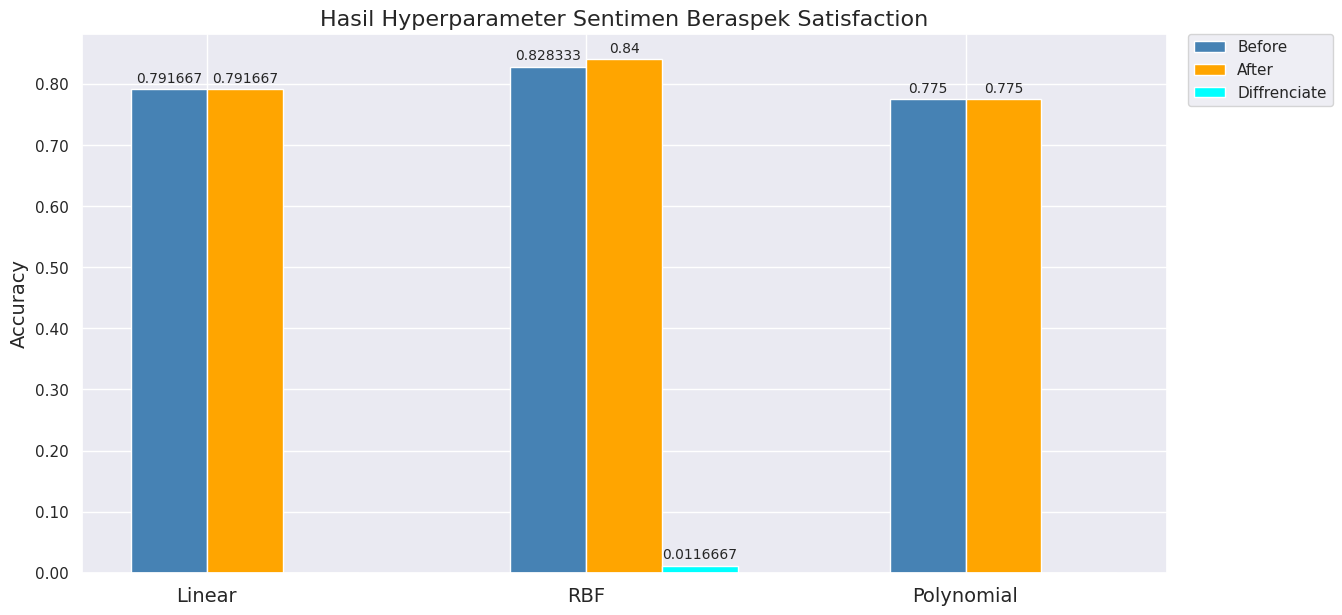

In [ ]:
import numpy as np
from matplotlib.ticker import FormatStrFormatter

import matplotlib.pyplot as plt
%matplotlib inline


name = ['Linear', 'RBF', 'Polynomial']
before_HT = [cv_linear.mean(), cv_rbf.mean(), cv_poly.mean()]
after_HT = [cross_val_score_linear.mean(), cross_val_score_rbf.mean(), cross_val_score_poly.mean()]
diff_linear = ((cross_val_score_linear.mean()-cv_linear.mean()))
diff_rbf = ((cross_val_score_rbf.mean()-cv_rbf.mean()))
diff_poly = ((cross_val_score_poly.mean()-cv_poly.mean()))
diff_HT = [diff_linear, diff_rbf, diff_poly]

x = np.arange(len(name))
width = 0.2

fig, ax = plt.subplots(figsize=(14, 7))

bfr = ax.bar(x - width/2, before_HT, width, label='Before', color='steelblue')
aftr = ax.bar(x + width/2, after_HT, width, label='After', color='orange')
diff = ax.bar(x + 0.3, diff_HT, width, label='Diffrenciate', color='cyan')

ax.set_title('Hasil Hyperparameter Sentimen Beraspek Satisfaction', size=16)
ax.set_ylabel('Accuracy', size=14)
ax.set_xticks(x)
ax.set_xticklabels(name, size=14)
ax.legend(fontsize=14)
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
ax.yaxis.set_major_formatter(FormatStrFormatter("%0.2f"))
for p in ax.patches:
    h = p.get_height()
    x = p.get_x()+p.get_width()/2
    if h!= 0:
      ax.annotate("%g" % p.get_height(), xy=(x,h), xytext=(0,5), textcoords="offset points",
                  ha="center", fontsize=10)

plt.show()

# Validasi Model Hyperparameter Tunning Data Test Linear Kernel

In [ ]:
grid_predictions = model_looks_linear_HT.predict(x_satisfaction_test_vectorized)

print("F1-SCORE ",f1(y_satisfaction_test,grid_predictions,average='macro') * 100)
print("ACCURACY ",acc(y_satisfaction_test,grid_predictions) * 100)
print("PRECISION ",prec(y_satisfaction_test,grid_predictions,average='macro') * 100)
print("RECALL",recall(y_satisfaction_test,grid_predictions,average='macro') * 100)

print('Confusion Matrix : \n', confusion_matrix(y_satisfaction_test, grid_predictions))
print('Report Hasil : \n',classification_report(y_satisfaction_test, grid_predictions))

F1-SCORE  61.7379172894868
ACCURACY  80.0
PRECISION  81.59183673469387
RECALL 56.81676008144929
Confusion Matrix : 
 [[  4  16   0]
 [  1 193   7]
 [  0  36  43]]
Report Hasil : 
               precision    recall  f1-score   support

          -1       0.80      0.20      0.32        20
           0       0.79      0.96      0.87       201
           1       0.86      0.54      0.67        79

    accuracy                           0.80       300
   macro avg       0.82      0.57      0.62       300
weighted avg       0.81      0.80      0.78       300



# Validasi Model Hyperparameter Tunning Data Test Polynomial Kernel

In [ ]:
grid_predictions = model_looks_poly_HT.predict(x_satisfaction_test_vectorized)

print("F1-SCORE ",f1(y_satisfaction_test,grid_predictions,average='macro') * 100)
print("ACCURACY ",acc(y_satisfaction_test,grid_predictions) * 100)
print("PRECISION ",prec(y_satisfaction_test,grid_predictions,average='macro') * 100)
print("RECALL",recall(y_satisfaction_test,grid_predictions,average='macro') * 100)

print('Confusion Matrix : \n', confusion_matrix(y_satisfaction_test, grid_predictions))
print('Report Hasil : \n',classification_report(y_satisfaction_test, grid_predictions))

F1-SCORE  60.92420666142145
ACCURACY  81.66666666666667
PRECISION  78.99259259259259
RECALL 56.40122173940424
Confusion Matrix : 
 [[  3  17   0]
 [  2 198   1]
 [  0  35  44]]
Report Hasil : 
               precision    recall  f1-score   support

          -1       0.60      0.15      0.24        20
           0       0.79      0.99      0.88       201
           1       0.98      0.56      0.71        79

    accuracy                           0.82       300
   macro avg       0.79      0.56      0.61       300
weighted avg       0.83      0.82      0.79       300



# Validasi Model Hyperparameter Tunning Data Test RBF Kernel

In [ ]:
grid_predictions = model_looks_rbf_HT.predict(x_satisfaction_test_vectorized)

print("F1-SCORE ",f1(y_satisfaction_test,grid_predictions,average='macro') * 100)
print("ACCURACY ",acc(y_satisfaction_test,grid_predictions) * 100)
print("PRECISION ",prec(y_satisfaction_test,grid_predictions,average='macro') * 100)
print("RECALL",recall(y_satisfaction_test,grid_predictions,average='macro') * 100)

print('Confusion Matrix : \n', confusion_matrix(y_satisfaction_test, grid_predictions))
print('Report Hasil : \n',classification_report(y_satisfaction_test, grid_predictions))

F1-SCORE  71.48253327056345
ACCURACY  86.0
PRECISION  77.12945590994372
RECALL 69.20607930810085
Confusion Matrix : 
 [[  6  13   1]
 [  4 184  13]
 [  0  11  68]]
Report Hasil : 
               precision    recall  f1-score   support

          -1       0.60      0.30      0.40        20
           0       0.88      0.92      0.90       201
           1       0.83      0.86      0.84        79

    accuracy                           0.86       300
   macro avg       0.77      0.69      0.71       300
weighted avg       0.85      0.86      0.85       300



# Validasi Model Hyperparameter Tunning Data Train Linear Kernel

In [ ]:
grid_predictions = model_looks_linear_HT.predict(x_satisfaction_train_vectorized)

print("F1-SCORE ",f1(y_satisfaction_train,grid_predictions,average='macro') * 100)
print("ACCURACY ",acc(y_satisfaction_train,grid_predictions) * 100)
print("PRECISION ",prec(y_satisfaction_train,grid_predictions,average='macro') * 100)
print("RECALL",recall(y_satisfaction_train,grid_predictions,average='macro') * 100)

print('Confusion Matrix : \n', confusion_matrix(y_satisfaction_train, grid_predictions))
print('Report Hasil : \n',classification_report(y_satisfaction_train, grid_predictions))

F1-SCORE  73.90434913474624
ACCURACY  87.16666666666667
PRECISION  92.81899918735785
RECALL 67.71782303584054
Confusion Matrix : 
 [[ 27  58   1]
 [  1 783   4]
 [  0  90 236]]
Report Hasil : 
               precision    recall  f1-score   support

          -1       0.96      0.31      0.47        86
           0       0.84      0.99      0.91       788
           1       0.98      0.72      0.83       326

    accuracy                           0.87      1200
   macro avg       0.93      0.68      0.74      1200
weighted avg       0.89      0.87      0.86      1200



# Validasi Model Hyperparameter Tunning Data Train Polynomial Kernel

In [ ]:
grid_predictions = model_looks_poly_HT.predict(x_satisfaction_train_vectorized)

print("F1-SCORE ",f1(y_satisfaction_train,grid_predictions,average='macro') * 100)
print("ACCURACY ",acc(y_satisfaction_train,grid_predictions) * 100)
print("PRECISION ",prec(y_satisfaction_train,grid_predictions,average='macro') * 100)
print("RECALL",recall(y_satisfaction_train,grid_predictions,average='macro') * 100)

print('Confusion Matrix : \n', confusion_matrix(y_satisfaction_train, grid_predictions))
print('Report Hasil : \n',classification_report(y_satisfaction_train, grid_predictions))

F1-SCORE  92.71652701855815
ACCURACY  93.25
PRECISION  96.41292777816174
RECALL 90.12560355684823
Confusion Matrix : 
 [[ 80   6   0]
 [  1 786   1]
 [  0  73 253]]
Report Hasil : 
               precision    recall  f1-score   support

          -1       0.99      0.93      0.96        86
           0       0.91      1.00      0.95       788
           1       1.00      0.78      0.87       326

    accuracy                           0.93      1200
   macro avg       0.96      0.90      0.93      1200
weighted avg       0.94      0.93      0.93      1200



# Validasi Model Hyperparameter Tunning Data Train RBF Kernel

In [ ]:
grid_predictions = model_looks_rbf_HT.predict(x_satisfaction_train_vectorized)

print("F1-SCORE ",f1(y_satisfaction_train,grid_predictions,average='macro') * 100)
print("ACCURACY ",acc(y_satisfaction_train,grid_predictions) * 100)
print("PRECISION ",prec(y_satisfaction_train,grid_predictions,average='macro') * 100)
print("RECALL",recall(y_satisfaction_train,grid_predictions,average='macro') * 100)

print('Confusion Matrix : \n', confusion_matrix(y_satisfaction_train, grid_predictions))
print('Report Hasil : \n',classification_report(y_satisfaction_train, grid_predictions))

F1-SCORE  93.27022859464446
ACCURACY  95.91666666666666
PRECISION  96.446317212856
RECALL 90.81269453173452
Confusion Matrix : 
 [[ 68  15   3]
 [  1 772  15]
 [  0  15 311]]
Report Hasil : 
               precision    recall  f1-score   support

          -1       0.99      0.79      0.88        86
           0       0.96      0.98      0.97       788
           1       0.95      0.95      0.95       326

    accuracy                           0.96      1200
   macro avg       0.96      0.91      0.93      1200
weighted avg       0.96      0.96      0.96      1200

